This script is written to get atmospheric data (pressure, temperature, etc., as a function of altitude, from a local data file.  The data is then plotted, and fit with a user-defined function

In [21]:
import numpy as np
import matplotlib.pyplot as plt

use_errors = False
fit_type = 1

Define a user funcion for fitting the data.

In [22]:
if fit_type == 1:
    def fitfunction(x,a,b):
        return a*np.exp(b*np.array(x))
else:
    def fitfunction(x,a,b,c):
        return a*np.exp(b*np.array(x)+c*np.power(np.array(x),1.5))

Define python arrays to store the data.

In [23]:
altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

Read data from the filem and store in the above python arrays.

In [24]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4]))
        viscosity.append(float(data[5]))
        

In [25]:

if use_errors == True:
    # create a list to hold the uncertainty in gravity
    gravity_uncertainty = [0.01,0.01,0.01,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.0001,0.0001,0.0001,0.00001,0.00001,0.000001,0.0000001,0.0000001]
else:
    gravity_uncertainty = [0.0]*len(gravity)
    
gravity_uncertainty = np.array(gravity_uncertainty)

Text(0, 0.5, 'g (m/s^2)')

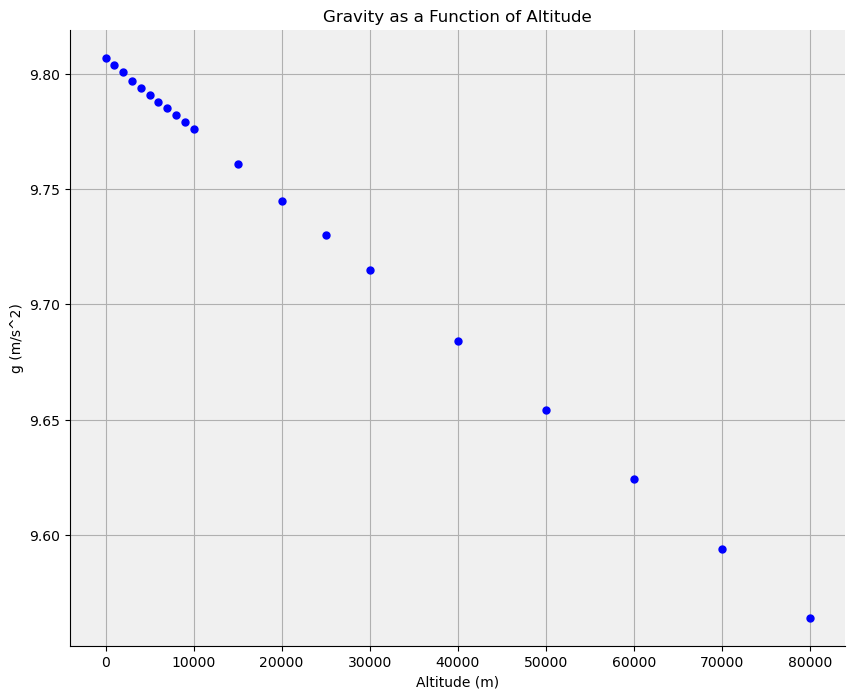

In [26]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
if use_errors == True:
    plt.errorbar(altitude, gravity, yerr=gravity_uncertainty, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
else:
    plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("g (m/s^2)")
#plt.yscale("log")

Fit the data with the pre-defined function

In [27]:
from scipy.optimize import curve_fit

if fit_type == 1:
    init_vals = [12.0,-0.0001]
else:
    init_vals = [12.0,-0.0001, -0.000001]

if use_errors == False:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

print (popt)
print (pcov)

[ 9.80661109e+00 -3.13369231e-07]
[[ 8.37873627e-09 -1.77980069e-14]
 [-1.77980069e-14  8.29153502e-20]]


In [28]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(altitude[i],*popt))
    chi2 += (density[i]-yfit[i])*(density[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 8.998E+02 / 18


Draw the graph

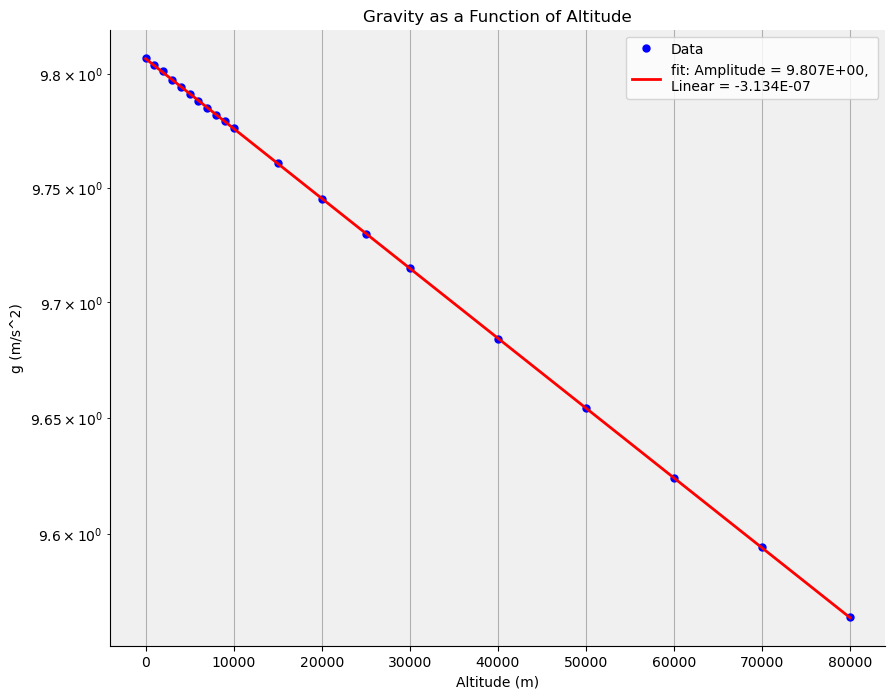

In [29]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
if fit_type == 1:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))
else:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E, \nQuadratic = %.3E' % tuple(popt))

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("g (m/s^2)")
plt.yscale("log")
plt.legend()

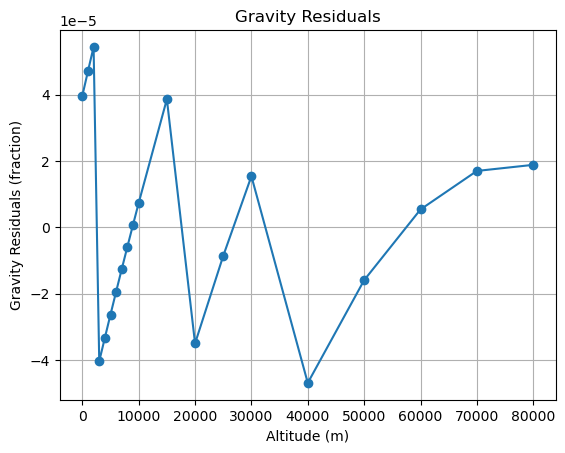

In [30]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt))/gravity, 'o-')

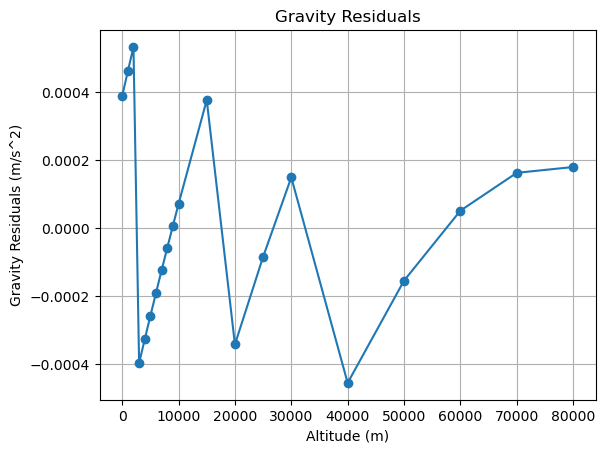

In [31]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt)), 'o-')
residuals = (gravity - fitfunction(altitude, *popt))
popt_exponential = popt

Gravity residuals are fairly small and appear to be somewhat periodic. The fit is already excellent, and trying to curvefit() with an added polynomial does not work. So, looks like we have the best fit we can get.